# R0 Analysis of COVID-19
22 March 2020

Cecilia García López de Munain

## Libraries

In [773]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle
from datetime import timedelta
import datetime

## Parameters

In [774]:
sys.path.append('./')

In [775]:
PATH_ROOT_INPUT_DATA = 'data\\input'
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME_COVID = 'covid_19_data_cum.pkl'
INTERIM_DATA_NAME_COVID1 = "data_V2_for_change_in_exponential_growth.pkl"
INTERIM_DATA_NAME_GOVM = 'government_measures.csv'

# Pre-Analisis

In [776]:
covid19_data_for_concat = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [777]:
covid19_data_for_concat.index = pd.to_datetime(covid19_data_for_concat.index)

In [778]:
covid19_data_for_concat[covid19_data_for_concat.CountryExp == "China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,1318.0
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1957.0


## Import Data

COVID Data

In [779]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [780]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [781]:
covid19_data["activos"] = covid19_data["activos"]  - covid19_data["NewConfCases"]

In [782]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

In [783]:
list(covid19_data['CountryExp'].sort_values().unique())

[' Azerbaijan',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands'

Government Measures Data

In [784]:
gov_measures = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA, INTERIM_DATA_NAME_GOVM))

In [785]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [786]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

In [787]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

# Indicator

In [788]:
covid19_data = covid19_data[covid19_data["NewConfCases_cum"]>0]

In [789]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [790]:
covid19_data["Infected_per_day"] = covid19_data["NewConfCases"]/covid19_data["activos"].where(covid19_data["activos"]!=0)
covid19_data["Infected_per_day"] = covid19_data["Infected_per_day"].fillna(0)

In [791]:
covid19_data[(covid19_data["activos"] == 0) & (covid19_data["NewConfCases"] != 0)].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-09,Albania,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-25,Algeria,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-02,Andorra,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Have to take care of the "infected_per_day" in the first day we have data as it will always be 1

# Suavisamos infectados por dia

In [792]:
infect = covid19_data.copy()
prom_movil = covid19_data['Infected_per_day'].copy()
numprommov = 5
for i in range(1,numprommov):
    prom_movil += covid19_data.shift(i)['Infected_per_day']
prom_movil = prom_movil/(numprommov)
covid19_data["Infected_per_day_suav"] = prom_movil 

In [793]:
covid19_data = covid19_data[covid19_data.shift(numprommov - 1)['CountryExp'] == covid19_data["CountryExp"]]

In [794]:
covid19_data[(covid19_data.CountryExp == "China")].head(60)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav
DateRep,,,,,,,,,,
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062
2020-01-27,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400
2020-01-28,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526
2020-01-29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493
2020-01-30,China,8124.0,171.0,135.0,2054.0,38.0,15.0,5764.0,0.356350,0.479074
2020-01-31,China,9783.0,213.0,214.0,1659.0,42.0,79.0,7697.0,0.215539,0.419709
2020-02-01,China,11871.0,259.0,275.0,2088.0,46.0,61.0,9249.0,0.225754,0.381509
2020-02-02,China,16607.0,361.0,463.0,4736.0,102.0,188.0,11047.0,0.428714,0.267252
2020-02-03,China,19693.0,425.0,614.0,3086.0,64.0,151.0,15568.0,0.198227,0.284917


In [795]:
covid19_data_copy_for_mean = covid19_data.copy()

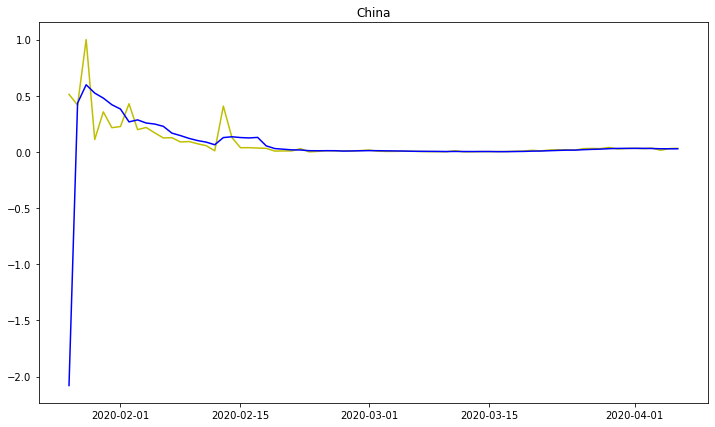

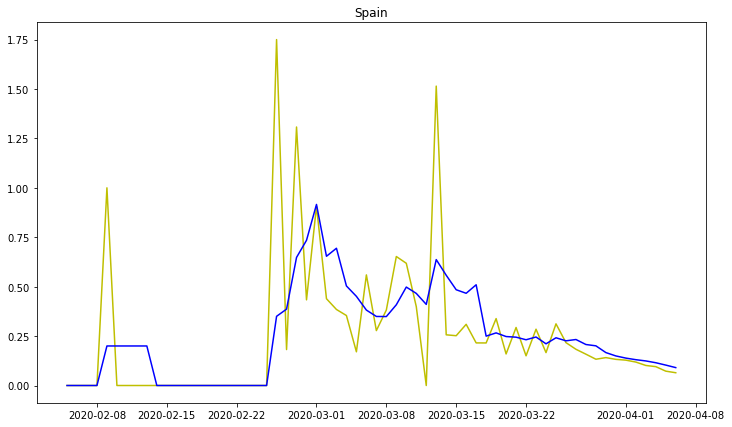

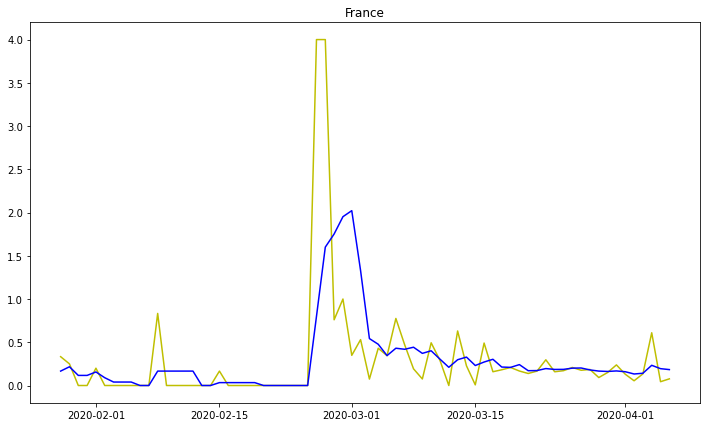

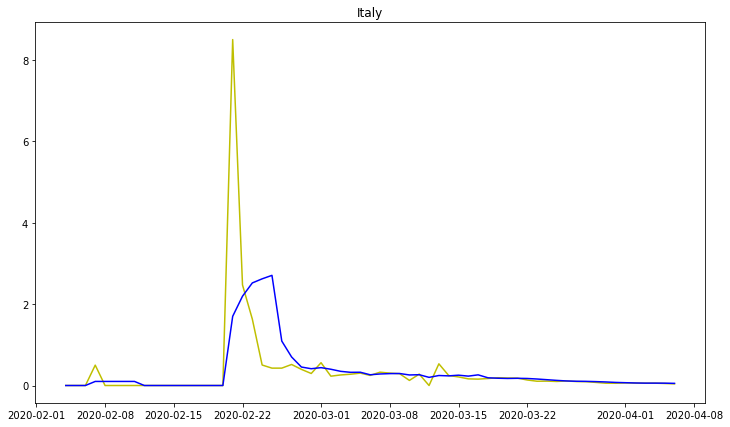

In [797]:
for country in ['China', 'Spain', 'France', 'Italy']:
        fig, ax1 = plt.subplots(figsize=(12, 7))

        ax1.plot(covid19_data.loc[covid19_data.loc[:,'CountryExp']==country,'Infected_per_day'], color='y')
        ax1.plot(covid19_data.loc[covid19_data.loc[:,'CountryExp']==country,'Infected_per_day_suav'], color='b')
        plt.title(country)

## Compute moving averages

In [798]:
def compute_growth_3days(df):
    '''This function computes the proportion in which the total confirmed cases increase each 3 days'''
    
    df.loc[:,'Growth3Days'] = np.nan
    df.sort_values(['CountryExp','DateRep'], inplace=True)
    df.loc[:,'Growth3Days'] = df.loc[:,'Infected_per_day_suav'] / df.shift(3).loc[:,'Infected_per_day_suav'].where(
        cond=(df.loc[:,'CountryExp'] == df.shift(3).loc[:,'CountryExp']) &
        (df.shift(3).loc[:,'NewConfCases_cum'] > 0)
    )
    df.sort_index(inplace=True)
    return df

In [799]:
#No deberia haber mas datos de China sino que Mainland China
covid19_data[covid19_data["CountryExp"] == "China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav
DateRep,,,,,,,,,,
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062
2020-01-27,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400
2020-01-28,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526
2020-01-29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493
2020-01-30,China,8124.0,171.0,135.0,2054.0,38.0,15.0,5764.0,0.356350,0.479074


In [800]:
compute_growth_3days(covid19_data)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days
DateRep,,,,,,,,,,,
2020-01-26,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN
2020-01-26,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN
2020-01-26,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN
2020-01-26,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-06,Bahrain,756.0,4.0,458.0,56.0,0.0,27.0,238.0,0.235294,0.172609,1.029054
2020-04-06,Norway,5865.0,76.0,32.0,178.0,5.0,0.0,5579.0,0.031905,0.038936,0.830108
2020-04-06,Germany,103374.0,1810.0,28700.0,3251.0,226.0,0.0,69613.0,0.046701,0.084254,0.766037


In [801]:
covid19_data[covid19_data["CountryExp"] == "China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days
DateRep,,,,,,,,,,,
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN
2020-01-27,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400,NaN
2020-01-28,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526,NaN
2020-01-29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493,-0.251672
2020-01-30,China,8124.0,171.0,135.0,2054.0,38.0,15.0,5764.0,0.356350,0.479074,1.102841


In [802]:
# Sort value for moving averages
covid19_data.reset_index().sort_values(['CountryExp','DateRep'], ascending=True, inplace=True)

In [803]:
# Compute previous growth average
def calc_pre_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'previous_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'previous_growth_3d'] = data.loc[:,'Growth3Days'].expanding(1).mean()

In [804]:
calc_pre_rolling_mean(covid19_data)

In [805]:
# Compute previous growth average
def calc_fwd_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'forward_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = data.sort_values(['CountryExp','DateRep'], ascending=False)['Growth3Days'].expanding(1).mean()
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = np.where(df.loc[df.loc[:,'CountryExp']==country,'Growth3Days'].notnull(), df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'], np.nan)
        

In [806]:
calc_fwd_rolling_mean(covid19_data)

In [807]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,
2020-01-26,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN,NaN,NaN
2020-01-26,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN,NaN,NaN
2020-01-26,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN,NaN,NaN
2020-01-26,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN,NaN,NaN
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN


In [808]:
covid19_data[covid19_data["CountryExp"] == "China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN
2020-01-27,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400,NaN,NaN,NaN
2020-01-28,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526,NaN,NaN,NaN
2020-01-29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493,-0.251672,-0.251672,0.983827
2020-01-30,China,8124.0,171.0,135.0,2054.0,38.0,15.0,5764.0,0.356350,0.479074,1.102841,0.425585,1.001996


In [809]:
covid19_data.loc[covid19_data.loc[:,'CountryExp']=='Argentina',:].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,
2020-03-07,Argentina,8.0,0.0,0.0,6.0,0.0,0.0,2.0,3.000000,0.800000,NaN,NaN,NaN
2020-03-08,Argentina,12.0,1.0,0.0,4.0,1.0,0.0,7.0,0.571429,0.914286,NaN,NaN,NaN
2020-03-09,Argentina,12.0,1.0,0.0,0.0,0.0,0.0,11.0,0.000000,0.914286,NaN,NaN,NaN
2020-03-10,Argentina,17.0,1.0,0.0,5.0,0.0,0.0,11.0,0.454545,1.005195,1.256494,1.256494,0.885848
2020-03-11,Argentina,19.0,1.0,0.0,2.0,0.0,0.0,16.0,0.125000,0.830195,0.908026,1.082260,0.872120


In [810]:
covid19_data.keys()

Index(['CountryExp', 'NewConfCases_cum', 'NewDeaths_cum', 'NewRecovered_cum',
       'NewConfCases', 'NewDeaths', 'NewRecovered', 'activos',
       'Infected_per_day', 'Infected_per_day_suav', 'Growth3Days',
       'previous_growth_3d', 'forward_growth_3d'],
      dtype='object')

## Join datasets

In [811]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,
2020-01-26,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN,NaN,NaN
2020-01-26,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN,NaN,NaN
2020-01-26,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN,NaN,NaN
2020-01-26,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN,NaN,NaN
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN


In [812]:
covid19_data = covid19_data.reset_index()

In [813]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
0,2020-01-26,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN,NaN,NaN
1,2020-01-26,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN,NaN,NaN
2,2020-01-26,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN,NaN,NaN
3,2020-01-26,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN,NaN,NaN
4,2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN


In [814]:
# Filter countries in Government Measures
covid19_data_filtered = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(list(gov_measures.loc[:,'CountryExp'].unique()))]
covid19_data_filtered.reset_index()
covid19_data_filtered = covid19_data_filtered.loc[covid19_data_filtered.loc[:,'NewConfCases']>0,['CountryExp', "DateRep"]].reset_index().groupby('CountryExp').min()

In [815]:
covid19_data_filtered = covid19_data_filtered.reset_index()

In [816]:
covid19_data_filtered.CountryExp.unique()

array(['China', 'France', 'Italy', 'Spain'], dtype=object)

In [817]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

In [818]:
covid19_data.CountryExp.unique()

array(['Japan', 'Thailand', 'South Korea', 'Taiwan', 'China', 'US',
       'Macau', 'Vietnam', 'Hong Kong', 'Singapore', 'France', 'Malaysia',
       'Nepal', 'Australia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany',
       'United Arab Emirates', 'Finland', 'India', 'Philippines', 'UK',
       'Sweden', 'Russia', 'Italy', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Afghanistan', 'Kuwait', 'Iraq',
       'Bahrain', 'Oman', 'Austria', 'Switzerland', 'Croatia', 'Algeria',
       'Romania', 'Norway', 'North Macedonia', 'Pakistan', 'Georgia',
       'Brazil', 'Greece', 'Estonia', 'San Marino', 'Netherlands',
       'Denmark', 'Mexico', 'Lithuania', 'New Zealand', 'Nigeria',
       'Iceland', 'Belarus', 'Luxembourg', 'Qatar', 'Monaco', 'Ireland',
       'Dominican Republic', 'Czech Republic', 'Ecuador', 'Armenia',
       'Azerbaijan', 'Indonesia', 'Morocco', 'Senegal', 'Saudi Arabia',
       'Portugal', 'Latvia', 'Andorra', 'Argentina', 'Jordan', 'Chile',
  

In [819]:
covid19_data_filtered.head()

,CountryExp,index,DateRep
0,China,4,2020-01-26
1,France,27,2020-01-28
2,Italy,223,2020-02-07
3,Spain,285,2020-02-09


In [820]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [821]:
covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')

In [822]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d
0,2020-01-26,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN,NaN,NaN
1,2020-01-26,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN,NaN,NaN
2,2020-01-26,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN,NaN,NaN
3,2020-01-26,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN,NaN,NaN
4,2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN


In [823]:
covid19_data_filtered.head()

,CountryExp,index,DateRep,Government Measure,DaysFromFirst
0,China,4,2020-01-26,Recomendación de aislamiento,23
1,China,4,2020-01-26,Limitaciones drásticas al transporte,24
2,China,4,2020-01-26,Cierre de espectáculos,24
3,China,4,2020-01-26,Cierre de escuelas,27
4,China,4,2020-01-26,Bloqueo de ciudades afectadas,34


In [824]:
# covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')
# covid19_data_filtered.loc[:,'DateRep'] 

covid19_data_filtered.loc[:,'DayOfGovM'] = pd.to_datetime(covid19_data_filtered.loc[:,'DateRep']) + pd.to_timedelta(covid19_data_filtered.loc[:,'DaysFromFirst'], unit='D')

In [825]:
covid19_data_filtered.head()

,CountryExp,index,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,4,2020-01-26,Recomendación de aislamiento,23,2020-02-18
1,China,4,2020-01-26,Limitaciones drásticas al transporte,24,2020-02-19
2,China,4,2020-01-26,Cierre de espectáculos,24,2020-02-19
3,China,4,2020-01-26,Cierre de escuelas,27,2020-02-22
4,China,4,2020-01-26,Bloqueo de ciudades afectadas,34,2020-02-29


In [826]:
covid19_data_filtered.dtypes

CountryExp                    object
index                          int64
DateRep                       object
Government Measure            object
DaysFromFirst                  int64
DayOfGovM             datetime64[ns]
dtype: object

In [827]:
covid19_data_filtered["DayOfGovM"] = pd.to_datetime(covid19_data_filtered["DayOfGovM"])

In [828]:
covid19_data_filtered.dtypes

CountryExp                    object
index                          int64
DateRep                       object
Government Measure            object
DaysFromFirst                  int64
DayOfGovM             datetime64[ns]
dtype: object

In [829]:
covid19_data.reset_index().dtypes

index                      int64
DateRep                   object
CountryExp                object
NewConfCases_cum         float64
NewDeaths_cum            float64
NewRecovered_cum         float64
NewConfCases             float64
NewDeaths                float64
NewRecovered             float64
activos                  float64
Infected_per_day         float64
Infected_per_day_suav    float64
Growth3Days              float64
previous_growth_3d       float64
forward_growth_3d        float64
dtype: object

In [830]:
covid19_data = covid19_data.reset_index()
covid19_data["DateRep"] = pd.to_datetime(covid19_data["DateRep"])

In [831]:
covid19_data.reset_index().dtypes

level_0                           int64
index                             int64
DateRep                  datetime64[ns]
CountryExp                       object
NewConfCases_cum                float64
NewDeaths_cum                   float64
NewRecovered_cum                float64
NewConfCases                    float64
NewDeaths                       float64
NewRecovered                    float64
activos                         float64
Infected_per_day                float64
Infected_per_day_suav           float64
Growth3Days                     float64
previous_growth_3d              float64
forward_growth_3d               float64
dtype: object

In [832]:
covid19_data_filtered.head()

,CountryExp,index,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,4,2020-01-26,Recomendación de aislamiento,23,2020-02-18
1,China,4,2020-01-26,Limitaciones drásticas al transporte,24,2020-02-19
2,China,4,2020-01-26,Cierre de espectáculos,24,2020-02-19
3,China,4,2020-01-26,Cierre de escuelas,27,2020-02-22
4,China,4,2020-01-26,Bloqueo de ciudades afectadas,34,2020-02-29


In [833]:
covid19_data_filtered = covid19_data_filtered.drop(columns=["index"])

In [834]:
covid19_data_withgovm = pd.merge(covid19_data.reset_index(), covid19_data_filtered.loc[:,['CountryExp','Government Measure','DayOfGovM','DaysFromFirst']], left_on=['CountryExp','DateRep'], right_on=['CountryExp','DayOfGovM'], how='left').set_index('DateRep')

In [835]:
covid19_data_withgovm.head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-01-26,0,0,Japan,4.0,0.0,1.0,2.0,0.0,1.0,1.0,2.000000,0.500000,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-26,1,1,Thailand,8.0,0.0,2.0,1.0,0.0,2.0,5.0,0.200000,0.353333,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-26,2,2,South Korea,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.300000,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-26,3,3,Taiwan,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.466667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-26,4,4,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN,NaN,NaT,NaN


In [836]:
covid19_data_withgovm = covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp'].isin(covid19_data_filtered.loc[:,'CountryExp']),:]

In [900]:
covid19_data_withgovm.CountryExp.unique()

array(['China', 'France', 'Italy', 'Spain'], dtype=object)

In [837]:
covid19_data.CountryExp.unique()

array(['Japan', 'Thailand', 'South Korea', 'Taiwan', 'China', 'US',
       'Macau', 'Vietnam', 'Hong Kong', 'Singapore', 'France', 'Malaysia',
       'Nepal', 'Australia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany',
       'United Arab Emirates', 'Finland', 'India', 'Philippines', 'UK',
       'Sweden', 'Russia', 'Italy', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Afghanistan', 'Kuwait', 'Iraq',
       'Bahrain', 'Oman', 'Austria', 'Switzerland', 'Croatia', 'Algeria',
       'Romania', 'Norway', 'North Macedonia', 'Pakistan', 'Georgia',
       'Brazil', 'Greece', 'Estonia', 'San Marino', 'Netherlands',
       'Denmark', 'Mexico', 'Lithuania', 'New Zealand', 'Nigeria',
       'Iceland', 'Belarus', 'Luxembourg', 'Qatar', 'Monaco', 'Ireland',
       'Dominican Republic', 'Czech Republic', 'Ecuador', 'Armenia',
       'Azerbaijan', 'Indonesia', 'Morocco', 'Senegal', 'Saudi Arabia',
       'Portugal', 'Latvia', 'Andorra', 'Argentina', 'Jordan', 'Chile',
  

## Analyse mesures

In [838]:
gov_measures.head(30)

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [839]:
gov_measures

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [840]:
list_of_measures = gov_measures.loc[:,'Government Measure'].unique()
list_of_countries =  list(covid19_data_withgovm.loc[:,'CountryExp'].unique())
print(list_of_measures)
print(list_of_countries)

['Alerta Epidemiológica' 'Supervisión de ingreso de pasajeros'
 'Cierre de escuelas' 'Licencias y home office' 'Cierre de espectáculos'
 'Restricciones al transporte público'
 'Limitaciones drásticas al transporte' 'Recomendación de aislamiento'
 'Bloqueo de ciudades afectadas' 'Cierre de fronteras'
 'Apertura de clases en algunas provincias']
['China', 'France', 'Italy', 'Spain']


In [841]:
[(x,y) for x in ['Cierre de escuelas', 'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'France'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'France'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain')]

In [842]:
measures_countries =  [(x,y) for x in ['Cierre de escuelas',  'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

In [843]:
def nearest(dates, date):
    return min(dates.index, key=lambda x: abs(x - date))

In [844]:
measures_countries

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'France'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'France'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain')]

In [845]:
dic = {}
for medida, country in measures_countries:
    if country not  in dic.keys():
        dic[country] = [medida]
    else:
        dic[country].append(medida)

In [846]:
dic

{'China': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'France': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'Italy': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'Spain': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte']}

In [847]:
covid19_data_withgovm[covid19_data_withgovm.CountryExp == "Mainland China"]

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,


### Some Plotting

China
Cierre de escuelas en  China  : 2020-02-22T00:00:00.000000000 con  76922.0 casos confirmados.
Cierre de espectáculos en  China  : 2020-02-19T00:00:00.000000000 con  74546.0 casos confirmados.


<ipython-input-848-60bdd8fc6828>:24: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Limitaciones drásticas al transporte en  China  : 2020-02-19T00:00:00.000000000 con  74546.0 casos confirmados.
France
Cierre de escuelas en  France  : 2020-03-19T00:00:00.000000000 con  10886.0 casos confirmados.
Cierre de espectáculos en  France  : 2020-03-11T00:00:00.000000000 con  2284.0 casos confirmados.
Italy
Cierre de escuelas en  Italy  : 2020-03-13T00:00:00.000000000 con  17660.0 casos confirmados.
Cierre de espectáculos en  Italy  : 2020-03-13T00:00:00.000000000 con  17660.0 casos confirmados.
Limitaciones drásticas al transporte en  Italy  : 2020-03-18T00:00:00.000000000 con  35713.0 casos confirmados.
Spain
Cierre de escuelas en  Spain  : 2020-03-21T00:00:00.000000000 con  25374.0 casos confirmados.
Cierre de espectáculos en  Spain  : 2020-03-22T00:00:00.000000000 con  28603.0 casos confirmados.
Limitaciones drásticas al transporte en  Spain  : 2020-03-28T00:00:00.000000000 con  73235.0 casos confirmados.


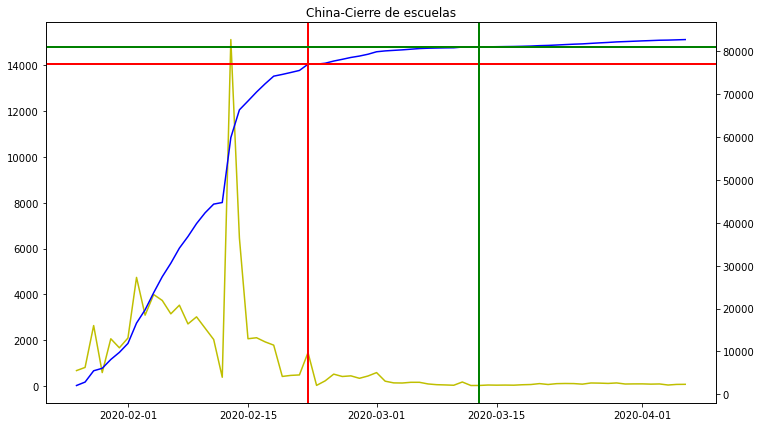

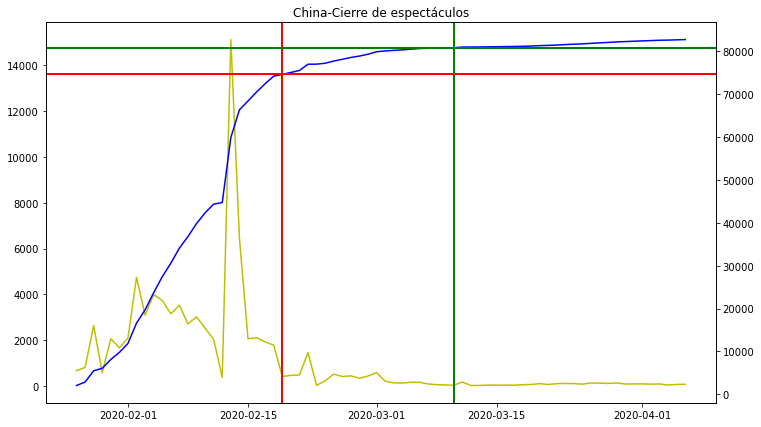

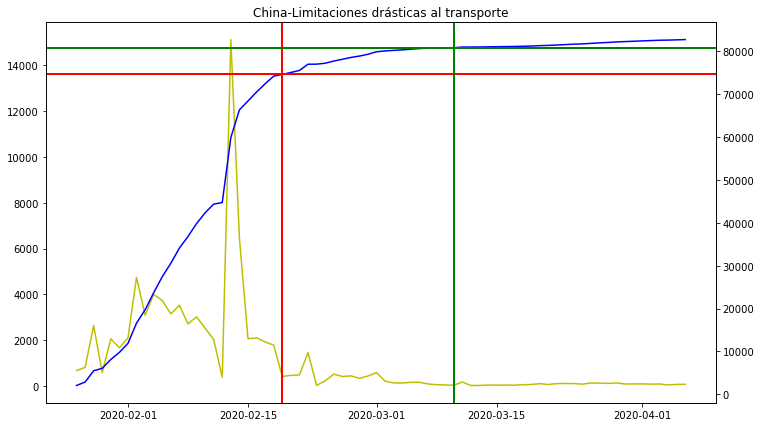

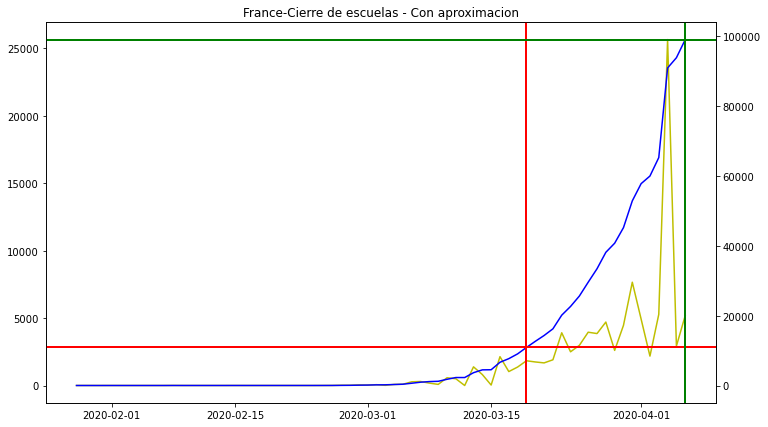

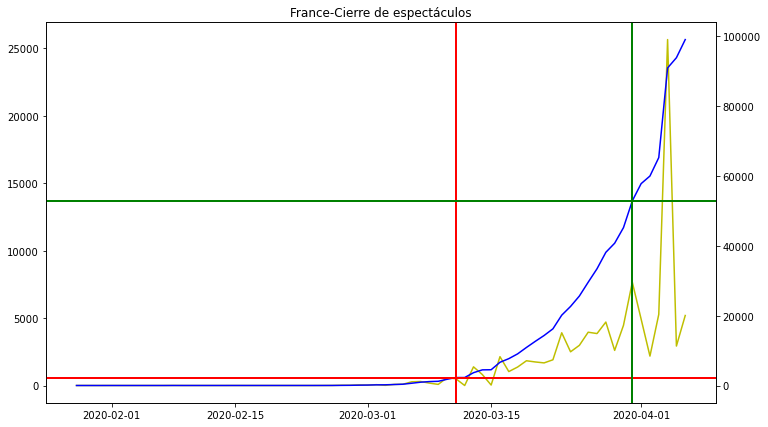

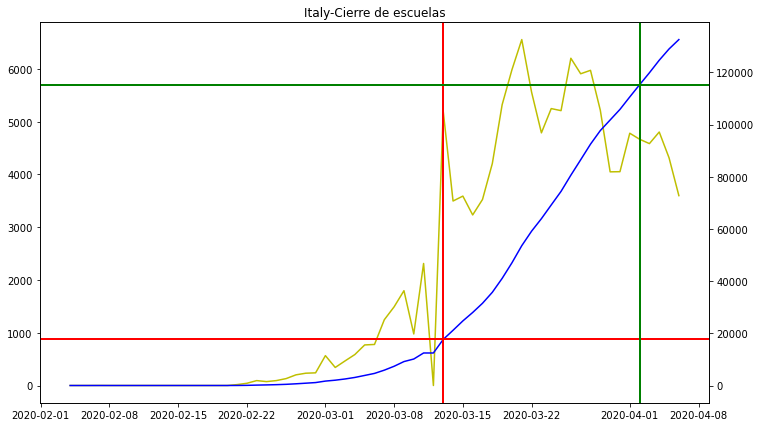

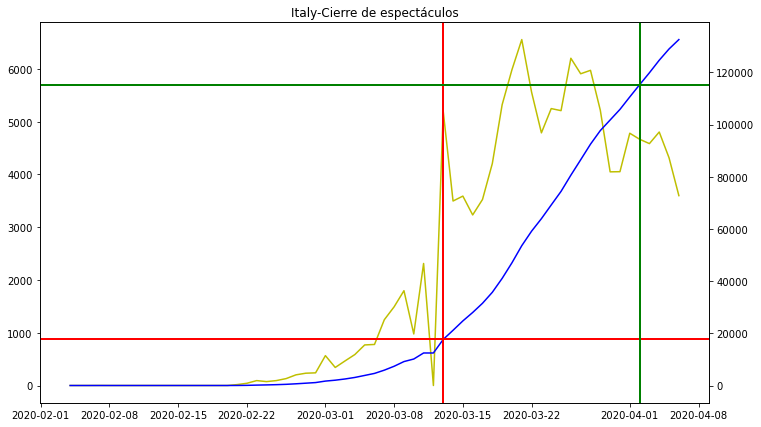

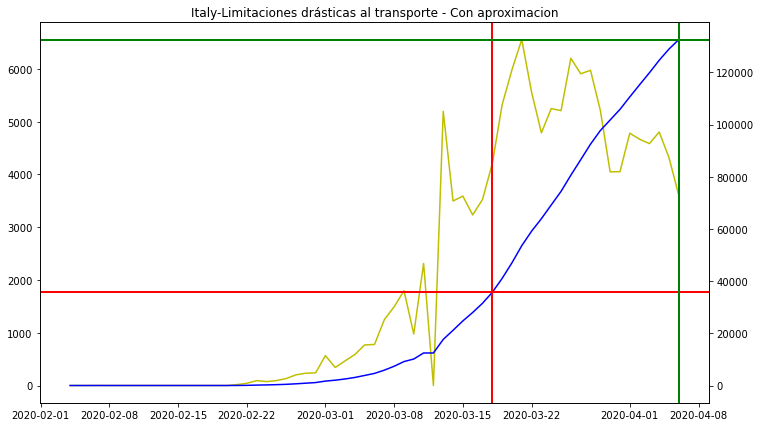

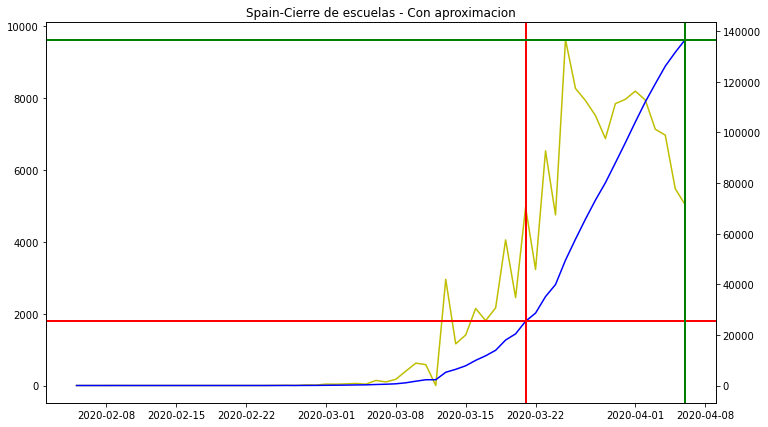

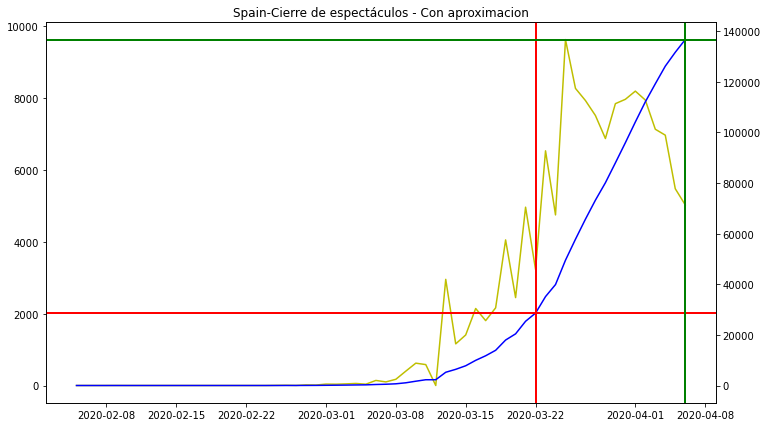

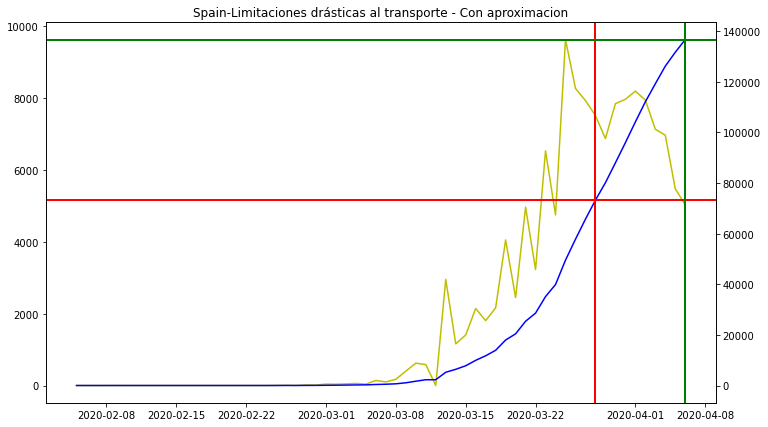

In [848]:
for country,medidas in dic.items():
    print(country)
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'NewConfCases_cum']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases'], color='y')
                        
            ax2 = ax1.twinx()

            ax2.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases_cum'], color='b')

            print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'casos confirmados.')

            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"NewConfCases_cum"]
            plt.axhline(y=value, linewidth=2, color='g')


<ipython-input-849-26739cfd9815>:19: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


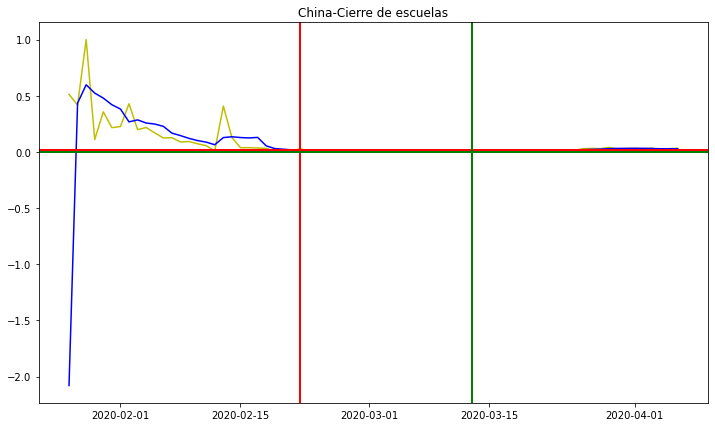

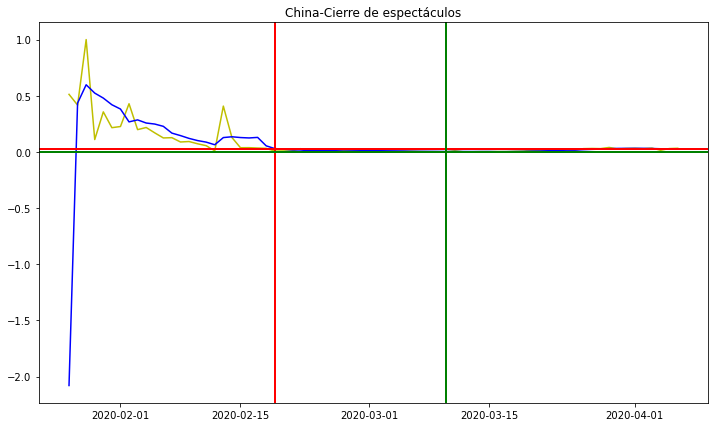

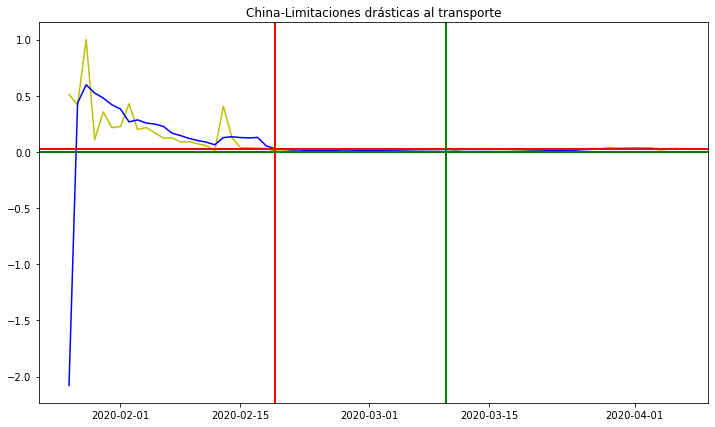

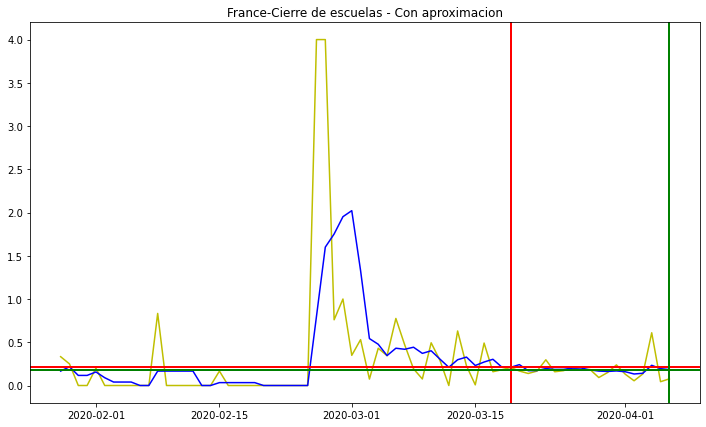

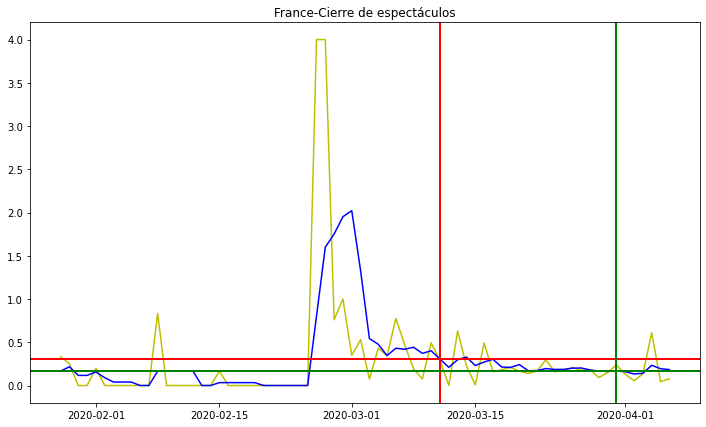

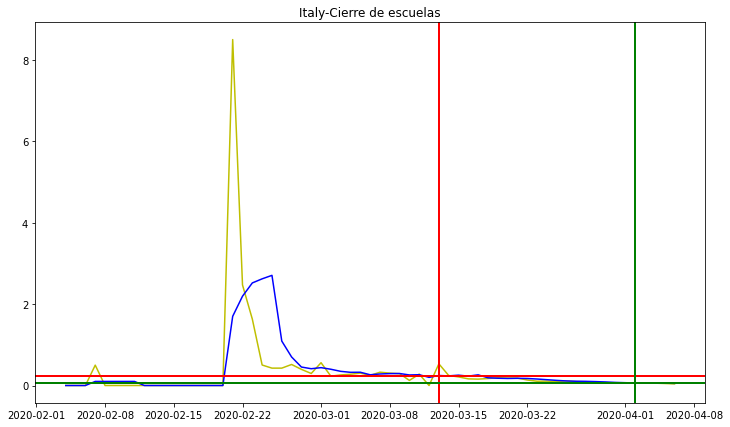

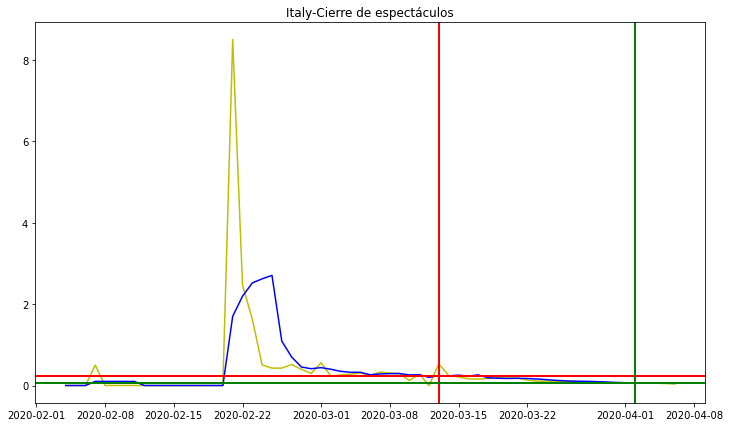

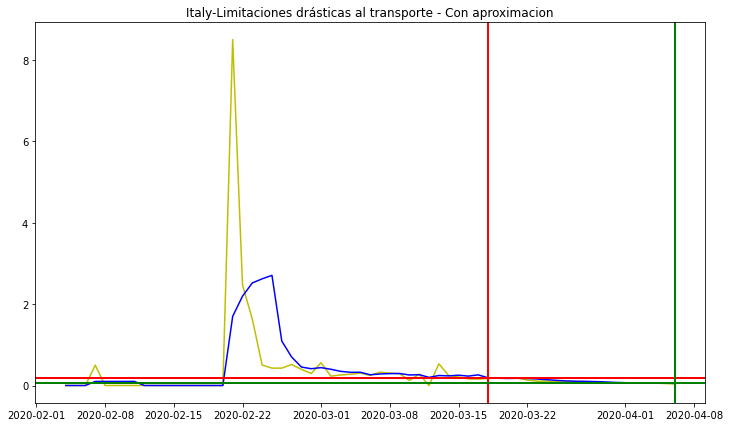

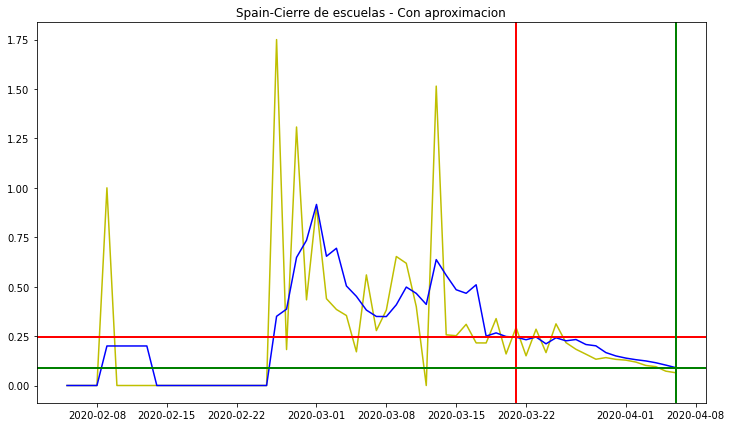

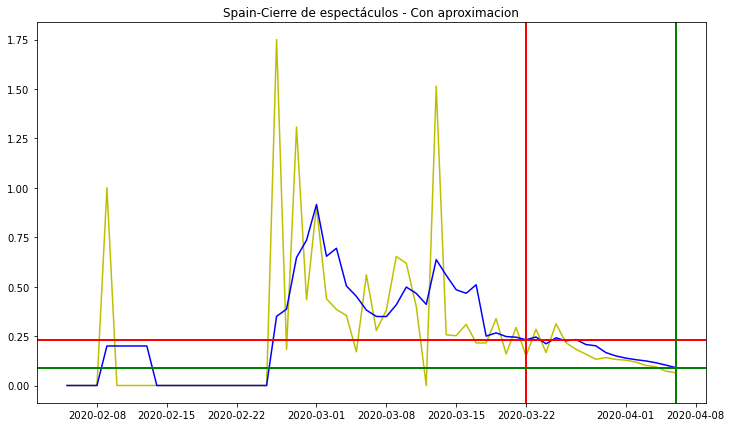

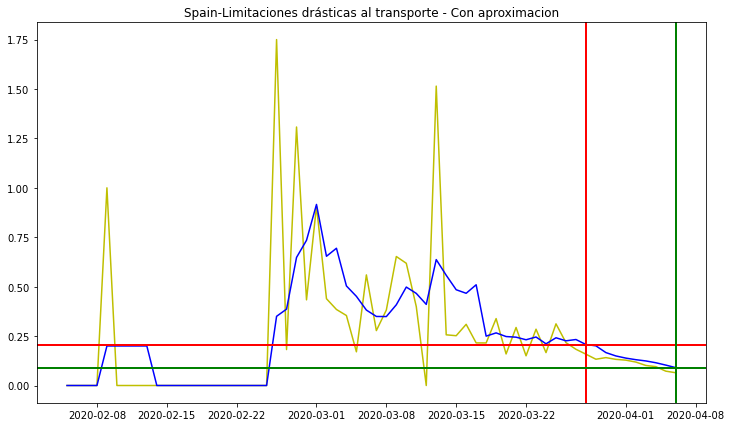

In [849]:
for country,medidas in dic.items():
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'Infected_per_day_suav']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day'], color='y')
            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day_suav'], color='b')

            
            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"Infected_per_day_suav"]
            plt.axhline(y=value, linewidth=2, color='g')

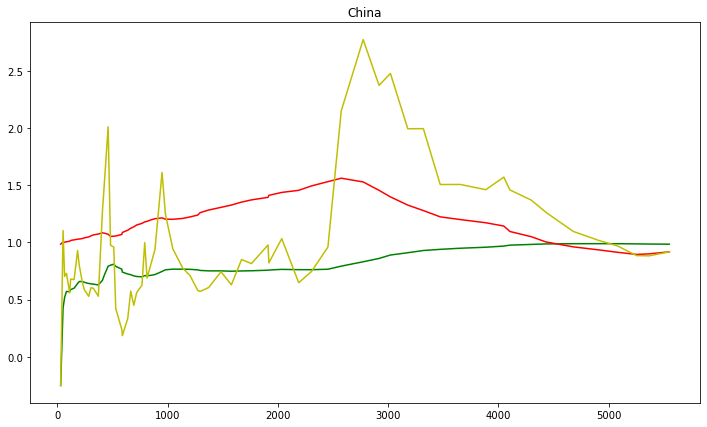

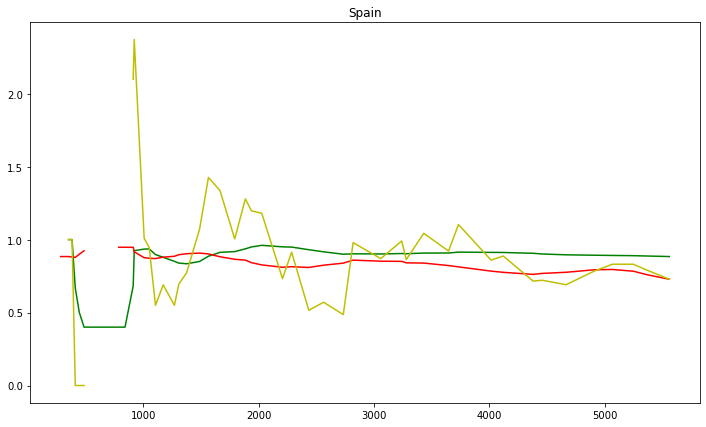

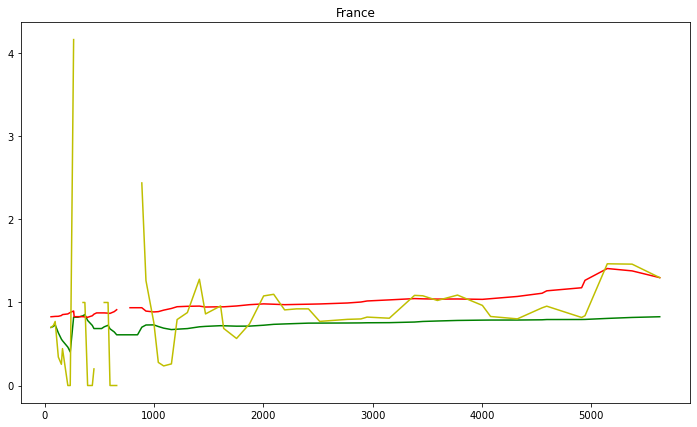

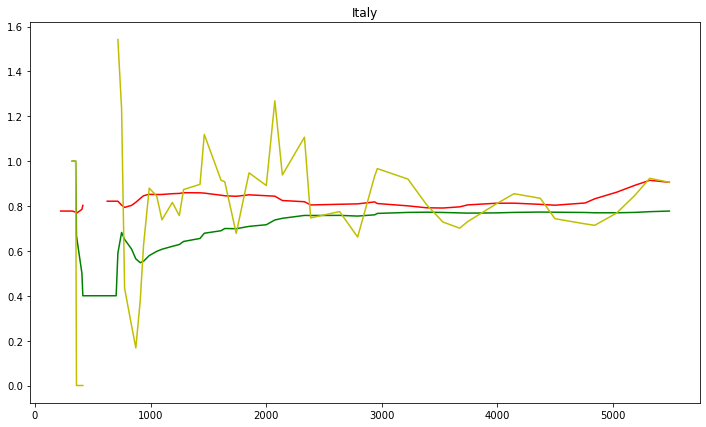

In [850]:
for country in ['China', 'Spain', 'France', 'Italy']:
        fig, ax1 = plt.subplots(figsize=(12, 7))

        ax1.plot(covid19_data.loc[covid19_data.loc[:,'CountryExp']==country,'previous_growth_3d'], color='g')
        ax1.plot(covid19_data.loc[covid19_data.loc[:,'CountryExp']==country,'forward_growth_3d'], color='r')
        ax1.plot(covid19_data.loc[covid19_data.loc[:,'CountryExp']==country,'Growth3Days'], color='y')
        plt.title(country)

In [851]:
covid19_data_withgovm[covid19_data_withgovm.CountryExp =="Spain"].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-05,186,186,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-06,203,203,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-07,214,214,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-08,241,241,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-09,285,285,Spain,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-10,308,308,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-11,327,327,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-12,354,354,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,1.000000,1.000000,0.883731,NaN,NaT,NaN
2020-02-13,384,384,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,1.000000,1.000000,0.880962,NaN,NaT,NaN


## Determine the effect on the exponential

In [852]:
covid19_data_withgovm.head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-01-26,4,4,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-27,11,11,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-28,24,24,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-28,27,27,France,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.166667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-29,29,29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493,-0.251672,-0.251672,0.983827,NaN,NaT,NaN


### Compute effects of gov measures

In [853]:
covid19_data_withgovm.groupby("CountryExp").count()["NewConfCases_cum"]

CountryExp
China     73
France    72
Italy     65
Spain     63
Name: NewConfCases_cum, dtype: int64

In [854]:
covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']=='China',:]

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-01-26,4,4,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-27,11,11,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-28,24,24,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-29,29,29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493,-0.251672,-0.251672,0.983827,NaN,NaT,NaN
2020-01-30,51,51,China,8124.0,171.0,135.0,2054.0,38.0,15.0,5764.0,0.356350,0.479074,1.102841,0.425585,1.001996,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,4915,4915,China,82432.0,3322.0,76565.0,71.0,6.0,160.0,2474.0,0.028698,0.031349,1.015311,0.988194,0.933364,NaN,NaT,NaN
2020-04-03,5080,5080,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2346.0,0.033674,0.030182,0.969307,0.987907,0.912877,NaN,NaT,NaN
2020-04-04,5255,5255,China,82543.0,3330.0,76946.0,32.0,4.0,186.0,2235.0,0.014318,0.027787,0.883788,0.986353,0.894067,NaN,NaT,NaN


In [855]:
# Consolidate effects of government measures on growth
measures_effect = covid19_data_withgovm.loc[~covid19_data_withgovm.loc[:,'Government Measure'].isna(),['CountryExp','Government Measure','DaysFromFirst','Growth3Days','previous_growth_3d','forward_growth_3d']]
measures_effect.rename(columns={'Growth3Days':'actual_value_growth'}, inplace=True)

In [856]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst,actual_value_growth,previous_growth_3d,forward_growth_3d
DateRep,,,,,,
2020-02-08,Italy,Recomendación de aislamiento,1.0,inf,NaN,0.777516
2020-02-15,Spain,Alerta Epidemiológica,6.0,0.000000,0.500000,0.900011
2020-02-18,China,Recomendación de aislamiento,23.0,0.421241,0.790046,1.055395
2020-02-19,China,Limitaciones drásticas al transporte,24.0,0.238133,0.764959,1.068607
2020-02-19,China,Cierre de espectáculos,24.0,0.238133,0.764959,1.068607
2020-02-22,China,Cierre de escuelas,27.0,0.573572,0.716895,1.123006
2020-02-29,China,Bloqueo de ciudades afectadas,34.0,0.937336,0.718271,1.206231
2020-03-01,Italy,Bloqueo de ciudades afectadas,23.0,0.626159,0.553953,0.845932
2020-03-11,France,Cierre de espectáculos,43.0,0.687852,0.719389,0.947883


In [857]:
# Compute impact
measures_effect.loc[:,'growth_effect'] = measures_effect.loc[:,'previous_growth_3d'] / measures_effect.loc[:,'forward_growth_3d']

In [858]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst,actual_value_growth,previous_growth_3d,forward_growth_3d,growth_effect
DateRep,,,,,,,
2020-02-08,Italy,Recomendación de aislamiento,1.0,inf,NaN,0.777516,NaN
2020-02-15,Spain,Alerta Epidemiológica,6.0,0.000000,0.500000,0.900011,0.555549
2020-02-18,China,Recomendación de aislamiento,23.0,0.421241,0.790046,1.055395,0.748578
2020-02-19,China,Limitaciones drásticas al transporte,24.0,0.238133,0.764959,1.068607,0.715847
2020-02-19,China,Cierre de espectáculos,24.0,0.238133,0.764959,1.068607,0.715847
2020-02-22,China,Cierre de escuelas,27.0,0.573572,0.716895,1.123006,0.638371
2020-02-29,China,Bloqueo de ciudades afectadas,34.0,0.937336,0.718271,1.206231,0.595467
2020-03-01,Italy,Bloqueo de ciudades afectadas,23.0,0.626159,0.553953,0.845932,0.654844
2020-03-11,France,Cierre de espectáculos,43.0,0.687852,0.719389,0.947883,0.758943


In [859]:
# China
china_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['China']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
china_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Bloqueo de ciudades afectadas,34.0,0.937336,0.595467
Cierre de escuelas,27.0,0.573572,0.638371
Cierre de espectáculos,24.0,0.238133,0.715847
Limitaciones drásticas al transporte,24.0,0.238133,0.715847
Recomendación de aislamiento,23.0,0.421241,0.748578


In [860]:
# European countries
european_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['France','Italy','Spain']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
european_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Alerta Epidemiológica,6.000000,0.000000,0.555549
Bloqueo de ciudades afectadas,23.000000,0.626159,0.654844
Cierre de escuelas,42.333333,0.899703,0.883373
Cierre de espectáculos,40.000000,0.835100,0.883851
Cierre de fronteras,40.000000,0.746889,0.941567
Licencias y home office,45.666667,0.890402,0.926398
Limitaciones drásticas al transporte,44.000000,0.802986,1.052668
Recomendación de aislamiento,26.000000,inf,0.765342
Restricciones al transporte público,46.000000,0.921414,1.104680


## Refinamiento de Europa

In [861]:
covid19_data_withgovm.head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-01-26,4,4,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,-2.080062,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-27,11,11,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,0.434400,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-28,24,24,China,5494.0,131.0,101.0,2631.0,49.0,43.0,2631.0,1.000000,0.597526,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-28,27,27,France,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.166667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-29,29,29,China,6070.0,133.0,120.0,576.0,2.0,19.0,5241.0,0.109903,0.523493,-0.251672,-0.251672,0.983827,NaN,NaT,NaN


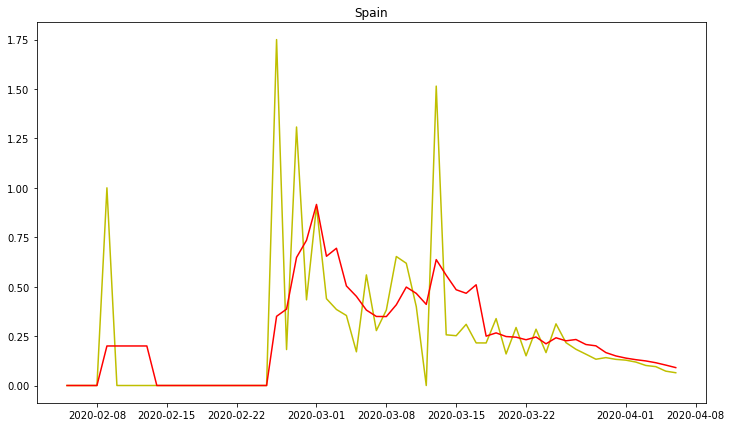

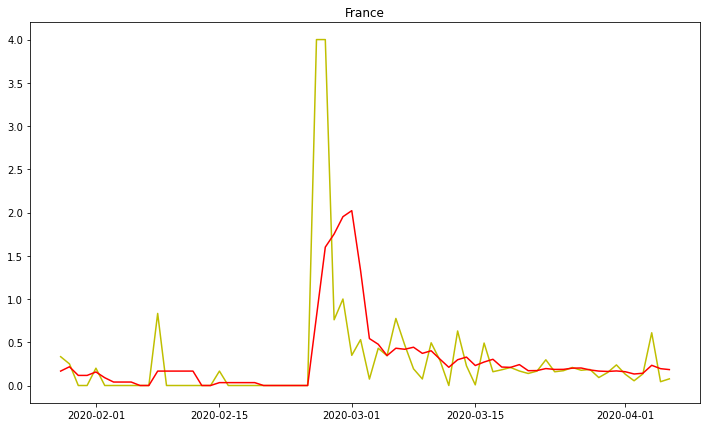

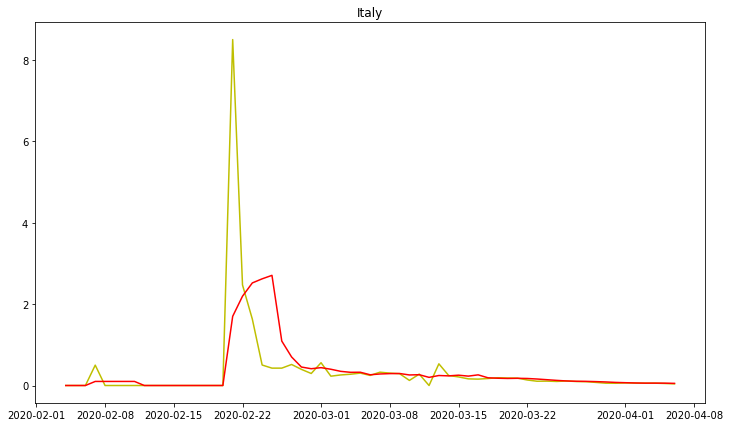

In [862]:
for country in ['Spain', 'France', 'Italy']:
        fig, ax1 = plt.subplots(figsize=(12, 7))

        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day'], color='y')
        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day_suav'], color='r')
        plt.title(country)

# Analizo italia para encontrar algun patron

In [863]:
data_italia = covid19_data_withgovm[covid19_data_withgovm.CountryExp == 'Italy'].copy()

In [864]:
data_italia.head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-04,147,147,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-05,182,182,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-06,194,194,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-07,223,223,Italy,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.5,0.1,inf,NaN,0.777516,NaN,NaT,NaN
2020-02-08,243,243,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.1,inf,NaN,0.777516,Recomendación de aislamiento,2020-02-08,1.0


In [865]:
def europe_gra(data,country):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    for i in [["NewConfCases_cum",'r'], ["activos",'b']]:
        ax1.plot(data[i[0]], color=i[1], label=i[0])
    ax2 = ax1.twinx()
    for j in [["Infected_per_day_suav",'y'], ["Infected_per_day",'g']]:
        ax2.plot(data[j[0]], color=j[1], label=j[0])
    ax2.legend()
    ax1.legend()
    plt.title(country)

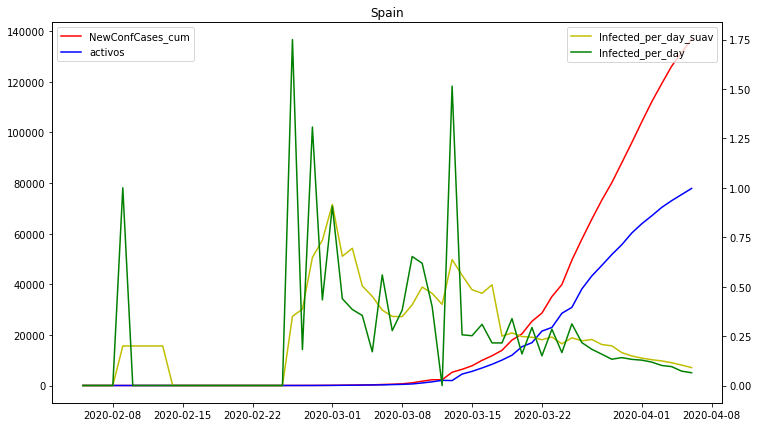

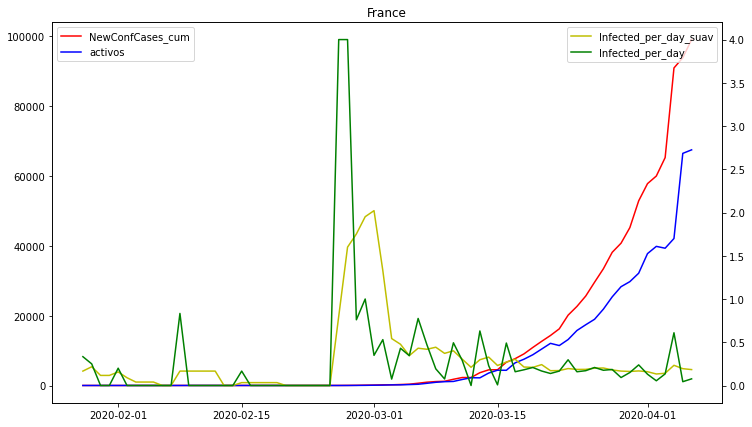

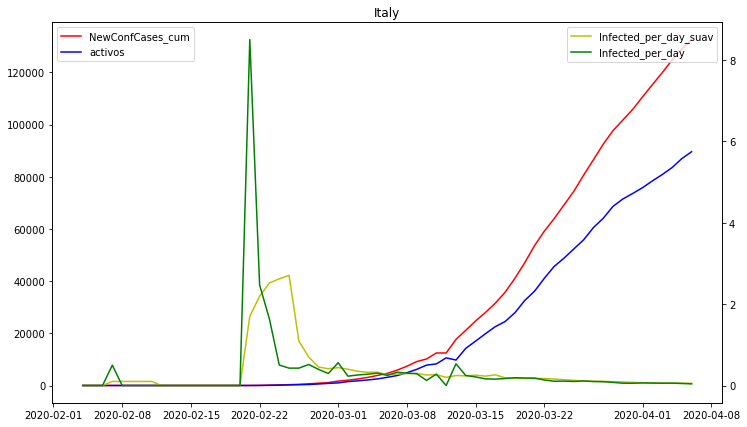

In [866]:
for country in ['Spain', 'France', 'Italy']:
    europe_gra(covid19_data_withgovm[covid19_data_withgovm.CountryExp == country], country)

# All have the same pattern, all of them have a delay after the first cases

In [867]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'France'].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-01-28,27,27,France,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,0.166667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-29,30,30,France,5.0,0.0,0.0,1.0,0.0,0.0,4.0,0.250000,0.216667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-30,55,55,France,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.116667,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-31,57,57,France,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.116667,0.700000,0.700000,0.828176,NaN,NaT,NaN
2020-02-01,79,79,France,6.0,0.0,0.0,1.0,0.0,0.0,5.0,0.200000,0.156667,0.723077,0.711538,0.830465,NaN,NaT,NaN
2020-02-02,95,95,France,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.090000,0.771429,0.731502,0.832418,NaN,NaT,NaN
2020-02-03,124,124,France,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.040000,0.342857,0.634341,0.833547,NaN,NaT,NaN
2020-02-04,152,152,France,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.040000,0.255319,0.558536,0.842805,NaN,NaT,NaN
2020-02-05,162,162,France,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.040000,0.444444,0.539521,0.854103,NaN,NaT,NaN


In [868]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Italy'].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-04,147,147,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-05,182,182,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-06,194,194,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-07,223,223,Italy,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,0.100000,inf,NaN,0.777516,NaN,NaT,NaN
2020-02-08,243,243,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.100000,inf,NaN,0.777516,Recomendación de aislamiento,2020-02-08,1.0
2020-02-09,274,274,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.100000,inf,NaN,0.777516,NaN,NaT,NaN
2020-02-10,323,323,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.100000,1.000000,1.000000,0.777516,NaN,NaT,NaN
2020-02-11,353,353,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.100000,1.000000,1.000000,0.772782,NaN,NaT,NaN
2020-02-12,360,360,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.666667,0.767842,NaN,NaT,NaN


In [869]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Spain'].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-05,186,186,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-06,203,203,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-07,214,214,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-08,241,241,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-09,285,285,Spain,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-10,308,308,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-11,327,327,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,inf,NaN,0.883731,NaN,NaT,NaN
2020-02-12,354,354,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,1.000000,1.000000,0.883731,NaN,NaT,NaN
2020-02-13,384,384,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,1.000000,1.000000,0.880962,NaN,NaT,NaN


In [870]:
europe_df = [covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Spain'].copy()
             , covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Italy'].copy()
             , covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'France'].copy()]

In [871]:
#saco el delay del primer infectado
for i in range(len(europe_df)):
    limite_date = europe_df[i][europe_df[i]["Infected_per_day"] == europe_df[i].groupby("CountryExp").max().reset_index()["Infected_per_day"][0]].index[0]
    print(limite_date)
    europe_df[i] = europe_df[i].loc[limite_date:]
    europe_df[i].reset_index(inplace=True)
    compute_growth_3days(europe_df[i])
    calc_pre_rolling_mean(europe_df[i])
    calc_fwd_rolling_mean(europe_df[i])
    europe_df[i].set_index("DateRep", inplace=True)
    

2020-02-26 00:00:00
2020-02-21 00:00:00
2020-02-26 00:00:00


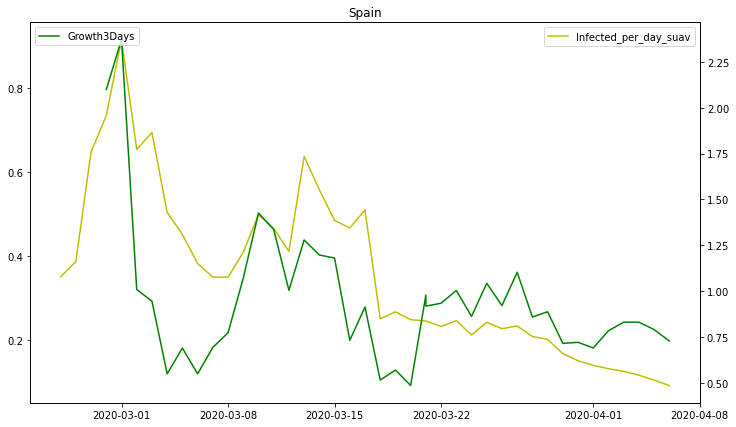

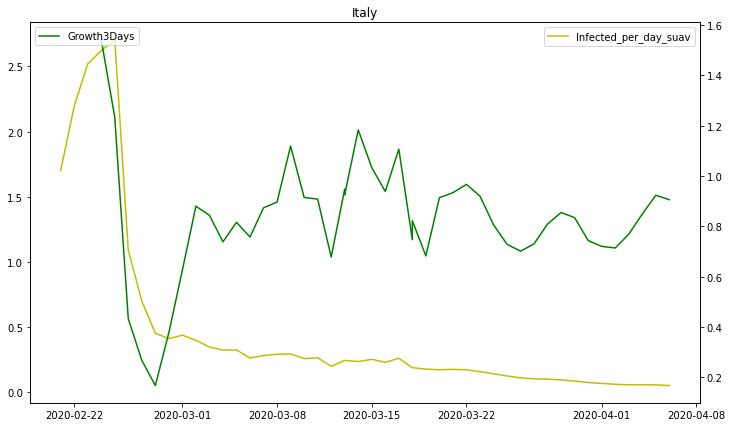

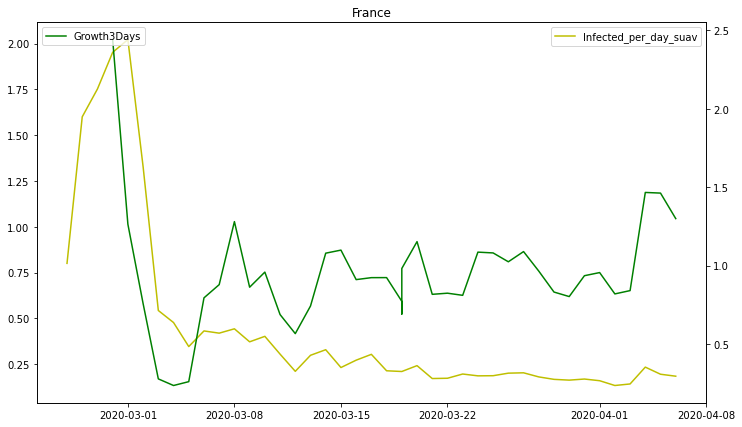

In [872]:
for df in europe_df:
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(df['Infected_per_day_suav'], color='y', Label="Infected_per_day_suav")
    plt.legend()
    #ax1.plot(europe_df[2]['forward_growth_3d'], color='r')
    #ax1.plot(europe_df[2]['previous_growth_3d'], color='b')
    ax2 = ax1.twinx()
    ax2.plot(df['Growth3Days'], color='g', Label="Growth3Days")

    ax1.legend()
    ax2.legend(loc='upper left')
    plt.title(df["CountryExp"][0])

# Hay que seguir suavizando

In [873]:
europe_df[2].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-26,780,780,France,18.0,2.0,11.0,4.0,1.0,0.0,1.0,4.000000,0.800000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-27,824,824,France,38.0,2.0,11.0,20.0,0.0,0.0,5.0,4.000000,1.600000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-28,849,849,France,57.0,2.0,11.0,19.0,0.0,0.0,25.0,0.760000,1.752000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-29,888,888,France,100.0,2.0,12.0,43.0,0.0,1.0,43.0,1.000000,1.952000,2.440000,2.440000,0.941150,NaN,NaT,NaN
2020-03-01,926,926,France,130.0,2.0,12.0,30.0,0.0,0.0,86.0,0.348837,2.021767,1.263605,1.851802,0.902718,NaN,NaT,NaN
2020-03-02,998,998,France,191.0,3.0,12.0,61.0,1.0,0.0,115.0,0.530435,1.327854,0.757908,1.487171,0.893221,NaN,NaT,NaN
2020-03-03,1039,1039,France,204.0,4.0,12.0,13.0,1.0,0.0,175.0,0.074286,0.542712,0.278028,1.184885,0.896878,NaN,NaT,NaN
2020-03-04,1088,1088,France,285.0,4.0,12.0,81.0,0.0,0.0,188.0,0.430851,0.476882,0.235874,0.995083,0.914069,NaN,NaT,NaN
2020-03-05,1159,1159,France,377.0,6.0,12.0,92.0,2.0,0.0,267.0,0.344569,0.345796,0.260417,0.872639,0.933446,NaN,NaT,NaN


In [874]:
numprommov = 10
prom_movil = covid19_data['Infected_per_day'].copy()
for j in range(len(europe_df)):
    europe_df[j].reset_index(inplace=True)
    
    for i in range(1,numprommov):
        prom_movil += europe_df[j].shift(i)['Infected_per_day']
    prom_movil = prom_movil/(numprommov)
    europe_df[j]["Infected_per_day_suav"] = prom_movil
    europe_df[j].set_index("DateRep", inplace=True)

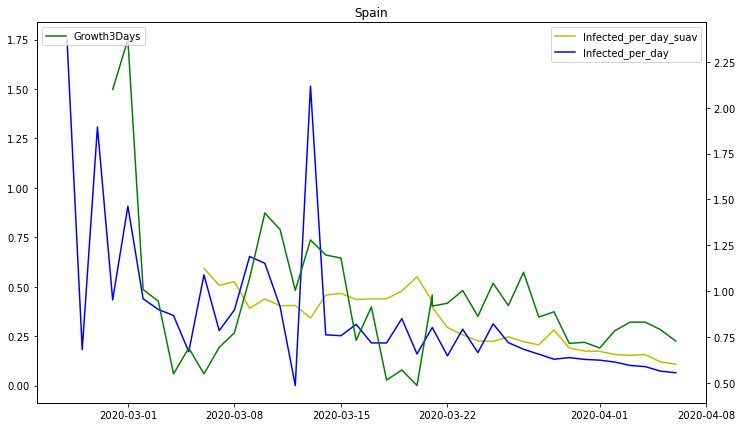

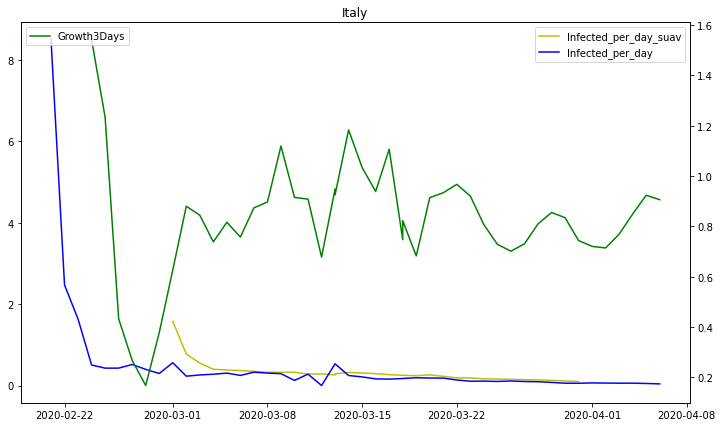

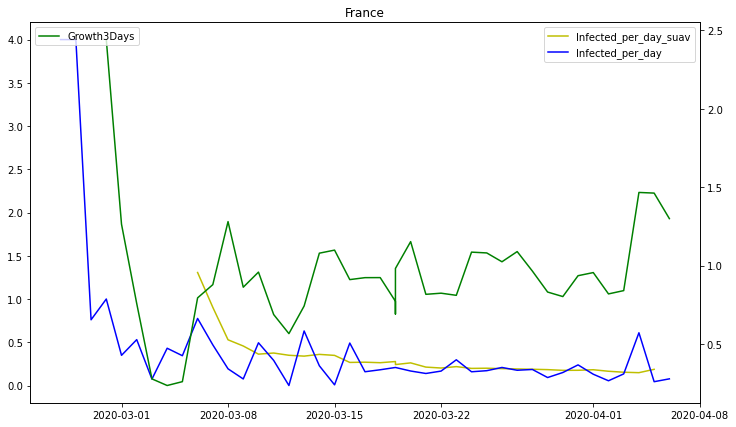

In [875]:
for df in europe_df:
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(df['Infected_per_day_suav'], color='y', Label="Infected_per_day_suav")
    ax1.plot(df['Infected_per_day'], color='b', Label="Infected_per_day")
    plt.legend()
    #ax1.plot(europe_df[2]['forward_growth_3d'], color='r')
    #ax1.plot(europe_df[2]['previous_growth_3d'], color='b')
    ax2 = ax1.twinx()
    ax2.plot(df['Growth3Days'], color='g', Label="Growth3Days")

    ax1.legend()
    ax2.legend(loc='upper left')
    plt.title(df["CountryExp"][0])

In [876]:
europe_df[2].head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-26,780,780,France,18.0,2.0,11.0,4.0,1.0,0.0,1.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-27,824,824,France,38.0,2.0,11.0,20.0,0.0,0.0,5.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-28,849,849,France,57.0,2.0,11.0,19.0,0.0,0.0,25.0,0.760000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-29,888,888,France,100.0,2.0,12.0,43.0,0.0,1.0,43.0,1.000000,NaN,2.440000,2.440000,0.941150,NaN,NaT,NaN
2020-03-01,926,926,France,130.0,2.0,12.0,30.0,0.0,0.0,86.0,0.348837,NaN,1.263605,1.851802,0.902718,NaN,NaT,NaN


In [877]:
measures_effect_europe = []
for i in range(len(europe_df)):
    provisorio = europe_df[i].loc[~europe_df[i].loc[:,'Government Measure'].isna(),['CountryExp','Government Measure','DaysFromFirst','Growth3Days','previous_growth_3d','forward_growth_3d']]
    provisorio.rename(columns={'Growth3Days':'actual_value_growth'}, inplace=True)
    provisorio.loc[:,'growth_effect'] = provisorio.loc[:,'previous_growth_3d'] / provisorio.loc[:,'forward_growth_3d']
    measures_effect_europe.append(provisorio)

In [878]:
measures_effect_europe_concat = pd.concat(measures_effect_europe, axis=0, ignore_index=True, sort=True)

In [879]:
measures_effect_europe_concat.head(15)

,CountryExp,DaysFromFirst,Government Measure,actual_value_growth,forward_growth_3d,growth_effect,previous_growth_3d
0,Spain,36.0,Supervisión de ingreso de pasajeros,0.732432,0.818421,1.358828,1.112093
1,Spain,41.0,Cierre de escuelas,0.978991,0.863931,1.176987,1.016836
2,Spain,41.0,Licencias y home office,0.918595,0.866968,1.167937,1.012564
3,Spain,42.0,Cierre de espectáculos,0.934386,0.856740,1.178079,1.009307
4,Spain,46.0,Restricciones al transporte público,0.921414,0.822007,1.218887,1.001934
5,Spain,48.0,Limitaciones drásticas al transporte,0.859083,0.783962,1.276265,1.000543
6,Italy,23.0,Bloqueo de ciudades afectadas,0.626159,0.852888,0.778437,0.663919
7,Italy,35.0,Cierre de escuelas,0.947888,0.857137,0.922342,0.790573
8,Italy,35.0,Cierre de espectáculos,0.925366,0.859664,0.927470,0.797313
9,Italy,40.0,Cierre de fronteras,0.746889,0.812694,1.031361,0.838181


In [880]:
european_effects_v2 = measures_effect_europe_concat.groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
european_effects_v2

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Bloqueo de ciudades afectadas,23.000000,0.626159,0.778437
Cierre de escuelas,42.333333,0.969497,0.997679
Cierre de espectáculos,40.000000,0.849202,1.013655
Cierre de fronteras,40.000000,0.746889,1.031361
Licencias y home office,45.666667,0.843251,1.037293
Limitaciones drásticas al transporte,44.000000,0.840748,1.153147
Recomendación de aislamiento,51.000000,0.772230,0.884130
Restricciones al transporte público,46.000000,0.921414,1.218887
Supervisión de ingreso de pasajeros,36.000000,0.732432,1.358828


In [881]:
#es muy complicado entender los resultados con este metodo por los picos tan altos que tiene

In [882]:
#calculamos el indicador a travez de la media

In [898]:
europe_df[2].head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,,
2020-02-26,780,780,France,18.0,2.0,11.0,4.0,1.0,0.0,1.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-27,824,824,France,38.0,2.0,11.0,20.0,0.0,0.0,5.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-28,849,849,France,57.0,2.0,11.0,19.0,0.0,0.0,25.0,0.760000,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-29,888,888,France,100.0,2.0,12.0,43.0,0.0,1.0,43.0,1.000000,NaN,2.440000,2.440000,0.941150,NaN,NaT,NaN
2020-03-01,926,926,France,130.0,2.0,12.0,30.0,0.0,0.0,86.0,0.348837,NaN,1.263605,1.851802,0.902718,NaN,NaT,NaN


In [884]:
europe_df[0][~europe_df[0]["Government Measure"].isna()].index

DatetimeIndex(['2020-03-16', '2020-03-21', '2020-03-21', '2020-03-22',
               '2020-03-26', '2020-03-28'],
              dtype='datetime64[ns]', name='DateRep', freq=None)

In [885]:
dic_effects_withmean = {}
for country,index in {"Spain":0, "Italy":1, "France":2}.items():
    df = europe_df[index].loc[:,["CountryExp", "NewCongCases_cum", "Government Measure", "Infected_per_day"]]
    for date in df[~df["Government Measure"].isna()].index:
        previous_event = df.loc[:date].groupby("CountryExp").mean().reset_index()
        after_event = df.loc[date:].groupby("CountryExp").mean().reset_index()

Spain 2020-03-16 00:00:00
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.557485
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.186287
Spain 2020-03-21 00:00:00
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.487141
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.169233
Spain 2020-03-21 00:00:00
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.487141
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.169233
Spain 2020-03-22 00:00:00
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.474663
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN          0.153692
Spain 2020-03-26 00:00:00
  CountryExp  NewCongCases_cum  Infected_per_day
0      Spain               NaN       

In [886]:
covid19_data_widthgov_by_mean = covid19_data_withgovm[["CountryExp","Infected_per_day","Government Measure",
                                                      "DayOfGovM","DaysFromFirst"]].copy()

In [887]:
covid19_data_widthgov_by_mean[covid19_data_widthgov_by_mean["CountryExp"] == "Spain"]

,CountryExp,Infected_per_day,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,
2020-02-05,Spain,0.000000,NaN,NaT,NaN
2020-02-06,Spain,0.000000,NaN,NaT,NaN
2020-02-07,Spain,0.000000,NaN,NaT,NaN
2020-02-08,Spain,0.000000,NaN,NaT,NaN
2020-02-09,Spain,1.000000,NaN,NaT,NaN
...,...,...,...,...,...
2020-04-02,Spain,0.118564,NaN,NaT,NaN
2020-04-03,Spain,0.101401,NaN,NaT,NaN
2020-04-04,Spain,0.095423,NaN,NaT,NaN


In [888]:
measures_effect_europe_concat.head(20)

,CountryExp,DaysFromFirst,Government Measure,actual_value_growth,forward_growth_3d,growth_effect,previous_growth_3d
0,Spain,36.0,Supervisión de ingreso de pasajeros,0.732432,0.818421,1.358828,1.112093
1,Spain,41.0,Cierre de escuelas,0.978991,0.863931,1.176987,1.016836
2,Spain,41.0,Licencias y home office,0.918595,0.866968,1.167937,1.012564
3,Spain,42.0,Cierre de espectáculos,0.934386,0.856740,1.178079,1.009307
4,Spain,46.0,Restricciones al transporte público,0.921414,0.822007,1.218887,1.001934
5,Spain,48.0,Limitaciones drásticas al transporte,0.859083,0.783962,1.276265,1.000543
6,Italy,23.0,Bloqueo de ciudades afectadas,0.626159,0.852888,0.778437,0.663919
7,Italy,35.0,Cierre de escuelas,0.947888,0.857137,0.922342,0.790573
8,Italy,35.0,Cierre de espectáculos,0.925366,0.859664,0.927470,0.797313
9,Italy,40.0,Cierre de fronteras,0.746889,0.812694,1.031361,0.838181


In [901]:
df_dic={"China":covid19_data_widthgov_by_mean[covid19_data_widthgov_by_mean["CountryExp"] == "China"].copy(),
       "Spain":covid19_data_widthgov_by_mean[covid19_data_widthgov_by_mean["CountryExp"] == "Spain"].copy(),
       "Italy":covid19_data_widthgov_by_mean[covid19_data_widthgov_by_mean["CountryExp"] == "Italy"].copy(),
       "France":covid19_data_widthgov_by_mean[covid19_data_widthgov_by_mean["CountryExp"] == "France"].copy(),
       }

In [902]:
df_dic["China"].head()

,CountryExp,Infected_per_day,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,
2020-01-26,China,0.512365,NaN,NaT,NaN
2020-01-27,China,0.416753,NaN,NaT,NaN
2020-01-28,China,1.000000,NaN,NaT,NaN
2020-01-29,China,0.109903,NaN,NaT,NaN
2020-01-30,China,0.356350,NaN,NaT,NaN


In [903]:
for country,df in df_dic.items():
    if country != "China":
        limite_date = df[df["Infected_per_day"] == df.groupby("CountryExp").max().reset_index()["Infected_per_day"][0]].index[0]
        print(limite_date)
        df = df.loc[limite_date:]
    df.loc[:,"previous_mean"] = np.nan
    df.loc[:,"previous_mean"] = df.loc[:,'Infected_per_day'].expanding(1).mean()
    df.loc[:,"forward_mean"] = np.nan
    df.reset_index(inplace=True)
    df.loc[:,"forward_mean"] = df.sort_values(['CountryExp','DateRep'], ascending=False)['Infected_per_day'].expanding(1).mean()
    #df.loc[:,"forward_mean"] = np.where(df.loc[:,'Growth3Days'].notnull(), df.loc[:,'forward_mean'], np.nan)
    df_dic[country] = df
        

2020-02-26 00:00:00
2020-02-21 00:00:00
2020-02-26 00:00:00


In [904]:
df_dic["Spain"].head()

,DateRep,CountryExp,Infected_per_day,Government Measure,DayOfGovM,DaysFromFirst,previous_mean,forward_mean
0,2020-02-26,Spain,1.750000,NaN,NaT,NaN,1.750000,0.360113
1,2020-02-27,Spain,0.181818,NaN,NaT,NaN,0.965909,0.326213
2,2020-02-28,Spain,1.307692,NaN,NaT,NaN,1.079837,0.329823
3,2020-02-29,Spain,0.433333,NaN,NaT,NaN,0.918211,0.304750
4,2020-03-01,Spain,0.906977,NaN,NaT,NaN,0.915964,0.301366


In [905]:
df_dic["Spain"].tail()

,DateRep,CountryExp,Infected_per_day,Government Measure,DayOfGovM,DaysFromFirst,previous_mean,forward_mean
37,2020-04-02,Spain,0.118564,NaN,NaT,NaN,0.389230,0.090516
38,2020-04-03,Spain,0.101401,NaN,NaT,NaN,0.381850,0.083504
39,2020-04-04,Spain,0.095423,NaN,NaT,NaN,0.374689,0.077538
40,2020-04-05,Spain,0.072607,NaN,NaT,NaN,0.367321,0.068595
41,2020-04-06,Spain,0.064584,NaN,NaT,NaN,0.360113,0.064584


In [906]:
for country,df in df_dic.items():
    df["MeasureEffect"] = df["forward_mean"].copy()/df["previous_mean"].copy()
    df_dic[country] = df

In [907]:
prueba = pd.concat(df_dic.values(), axis=0, ignore_index=True, sort=True)

In [908]:
for country,df in df_dic.items():
    df = df[~df["Government Measure"].isna()]
    df_dic[country] = df

In [909]:
df_dic["China"].head(40)

,DateRep,CountryExp,Infected_per_day,Government Measure,DayOfGovM,DaysFromFirst,previous_mean,forward_mean,MeasureEffect
23,2020-02-18,China,0.031604,Recomendación de aislamiento,2020-02-18,23.0,0.212296,0.013663,0.064359
24,2020-02-19,China,0.007258,Limitaciones drásticas al transporte,2020-02-19,24.0,0.204095,0.013423,0.065768
25,2020-02-19,China,0.007258,Cierre de espectáculos,2020-02-19,24.0,0.196524,0.013297,0.067661
28,2020-02-22,China,0.028802,Cierre de escuelas,2020-02-22,27.0,0.177776,0.013777,0.077494
35,2020-02-29,China,0.011632,Bloqueo de ciudades afectadas,2020-02-29,34.0,0.144726,0.014425,0.099672


In [910]:
mean_method = pd.concat(df_dic.values(), axis=0, ignore_index=True, sort=True)

In [911]:
mean_method.loc[:,["CountryExp","DateRep","DayOfGovM","Government Measure", "Infected_per_day", "MeasureEffect"]].head(30)

,CountryExp,DateRep,DayOfGovM,Government Measure,Infected_per_day,MeasureEffect
0,China,2020-02-18,2020-02-18,Recomendación de aislamiento,0.031604,0.064359
1,China,2020-02-19,2020-02-19,Limitaciones drásticas al transporte,0.007258,0.065768
2,China,2020-02-19,2020-02-19,Cierre de espectáculos,0.007258,0.067661
3,China,2020-02-22,2020-02-22,Cierre de escuelas,0.028802,0.077494
4,China,2020-02-29,2020-02-29,Bloqueo de ciudades afectadas,0.011632,0.099672
5,Spain,2020-03-16,2020-03-16,Supervisión de ingreso de pasajeros,0.309558,0.334156
6,Spain,2020-03-21,2020-03-21,Cierre de escuelas,0.293554,0.327187
7,Spain,2020-03-21,2020-03-21,Licencias y home office,0.293554,0.347400
8,Spain,2020-03-22,2020-03-22,Cierre de espectáculos,0.150235,0.323793
9,Spain,2020-03-26,2020-03-26,Restricciones al transporte público,0.216887,0.289426


In [933]:
covid19_data_copy_for_mean.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav
DateRep,,,,,,,,,,
2020-02-28,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-02-29,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-01,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-02,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-03,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


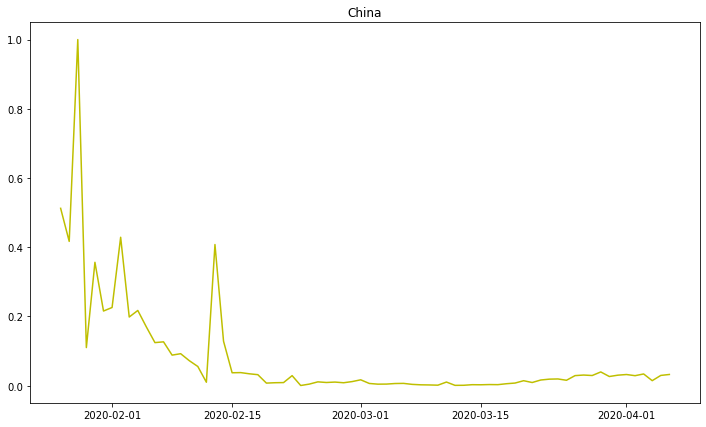

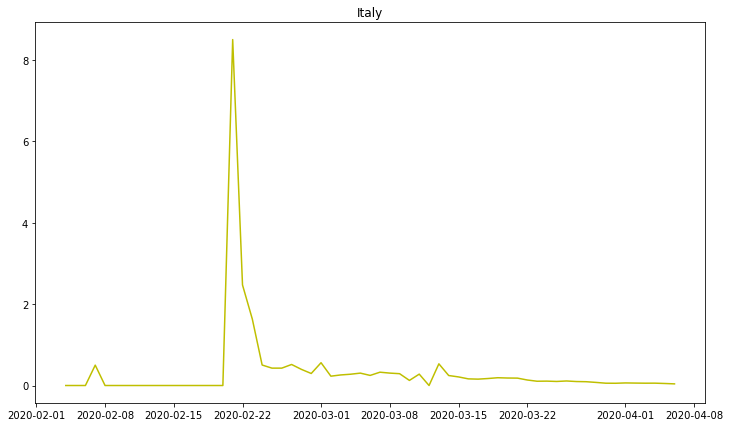

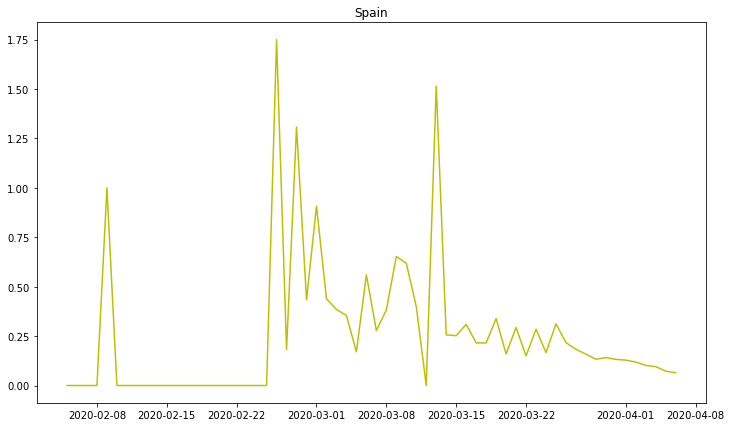

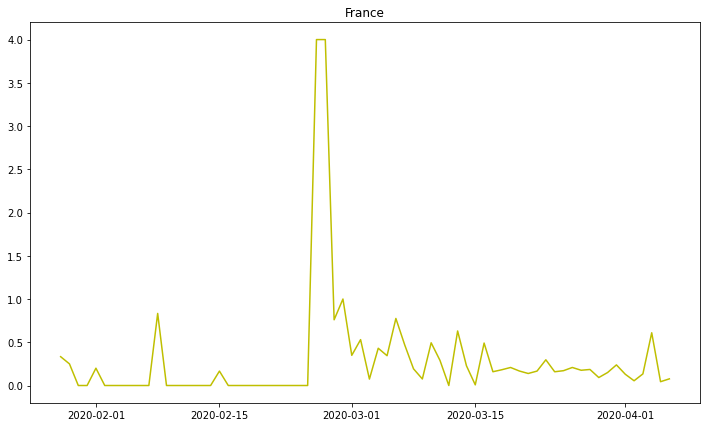

In [931]:
for country in ["China","Italy", "Spain","France"]:
    plts = covid19_data_copy_for_mean[covid19_data_copy_for_mean.CountryExp == country]['Infected_per_day']
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(plts, color='y', Label="Infected_per_day")
    plt.title(country)

In [937]:
prueba.set_index("DateRep", inplace=True)

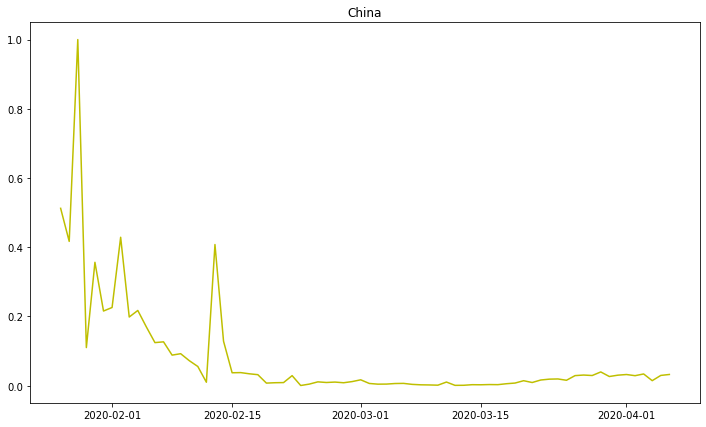

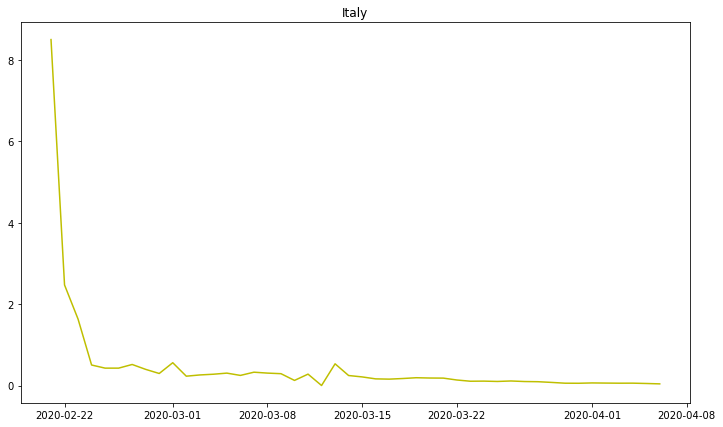

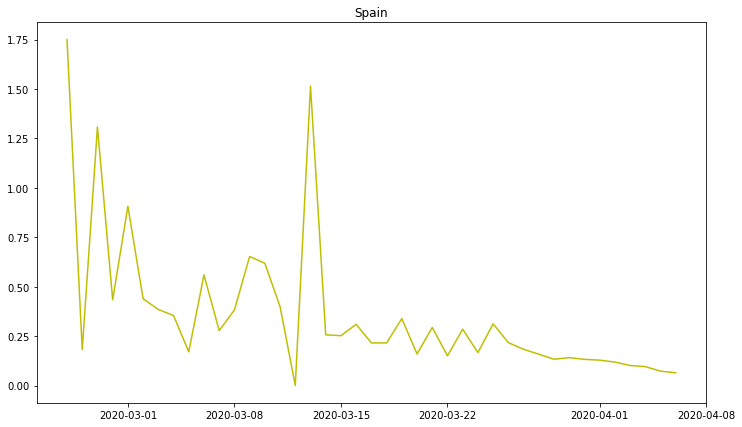

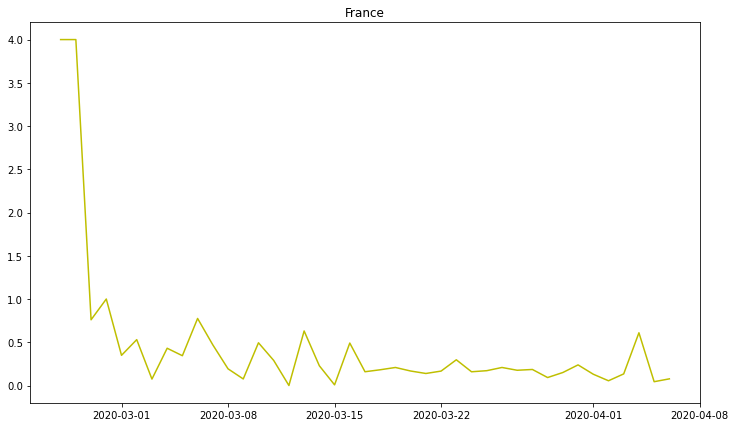

In [938]:
for country in ["China","Italy", "Spain","France"]:
    plts = prueba[prueba.CountryExp == country]['Infected_per_day']
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.plot(plts, color='y', Label="Infected_per_day")
    plt.title(country)

In [940]:
covid19_data_copy_for_mean[covid19_data_copy_for_mean.CountryExp =="Spain"].head(50)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Infected_per_day_suav
DateRep,,,,,,,,,,
2020-02-05,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2020-02-06,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2020-02-07,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2020-02-08,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2020-02-09,Spain,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.200000
2020-02-10,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000
2020-02-11,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000
2020-02-12,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000
2020-02-13,Spain,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000


In [ ]:
df_effects = european_effects.merge(china_effects,left_index=True,right_index=True,how='outer',suffixes=('_eu', '_ch'))

df_effects.loc[:,'effect_diff'] = (df_effects.loc[:,'growth_effect_eu'] - df_effects.loc[:,'growth_effect_ch']) / df_effects.loc[:,'growth_effect_eu']